# Personality Analysis for Marketing Campaign

# **Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### **People**

    ID: dfomer's unique identifier
    Year_Birth: dfomer's birth year
    Education: dfomer's education level
    Marital_Status: dfomer's marital status
    Income: dfomer's yearly household income
    Kidhome: Number of children in dfomer's household
    Teenhome: Number of teenagers in dfomer's household
    Dt_dfomer: Date of dfomer's enrollment with the company
    Recency: Number of days since dfomer's last purchase
    Complain: 1 if dfomer complained in the last 2 years, 0 otherwise


**Products**

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years


**Promotion**

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if dfomer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if dfomer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if dfomer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if dfomer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if dfomer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if dfomer accepted the offer in the last campaign, 0 otherwise


**Place**

    NumWebPurchases: Number of purchases made through the company’s web site
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s web site in the last month


### (1) Import libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from math import floor
from matplotlib import colors
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


### (2) Import the CSV file

In [77]:
## importing the csv file
df = pd.read_csv('./marketing-campaign.csv')

In [78]:
## Reading the csv file
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### (3) Explore data (for example, see what is categorial and numerical)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [80]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [81]:
## Checking for number of rows and columns
df.shape

(2240, 29)

### (4) Feature engineering for data that is
#### (a) relevant 
#### (b) unique
#### (c) correct 
#### (d) not missing

#### Drop data that is not a,b,c, or d


In [82]:
# checking for Null values
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [83]:
## Filling the null values of Income with the mean of income column
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [84]:
# checking for Null values
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [85]:
## Checking for unique values in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [86]:
#Checking NuLL Values And Dropping Them Off
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [87]:
## Dropping irrelevant features
df = df.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'], axis = 1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Changing values

In [88]:
## name of all columns
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



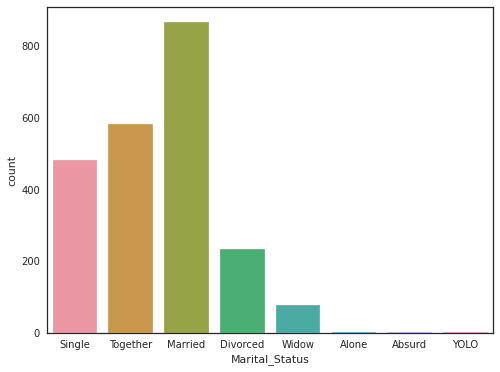

In [89]:
# Analyze Marital status 
print(df['Marital_Status'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Marital_Status'])

In [90]:
#correlation between Marital_Status and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')
 
columns_to_be_analyzed = ['MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Marital_df = df.groupby(by = ['Marital_Status']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum',
                                              'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = Marital_df['Marital_Status'].to_numpy(), 
                             y = Marital_df[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace", size=12, color="#7f7f7f"), showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [91]:
## Changing marital status
## using map function from dataframe
marital_status = {
    "Single": "non_relationship",
    "Together": "in_relationship",
    "Married": "in_relationship",
    "Divorced": "non_relationship",
    "Widow": "non_relationship",
    "Alone": "non_relationship",
    "Absurd": "non_relationship",
    "YOLO": "non_relationship"
}

In [92]:
## Below command goes through every entry in the notebook and replaces each data with its associated value in the dictionary
df["Marital_Status"] = df["Marital_Status"].map(marital_status)

In [93]:
## Checking if everything is substituted
df["Marital_Status"].value_counts()

in_relationship     1444
non_relationship     796
Name: Marital_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



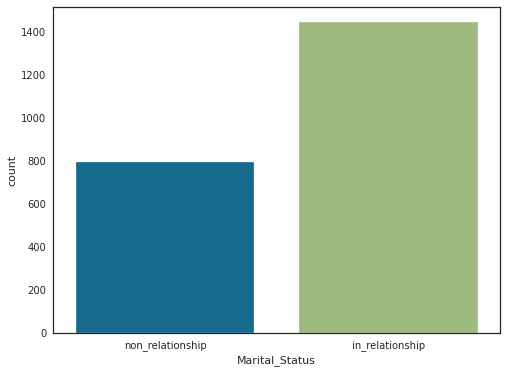

In [94]:
## Visulaize Marital Status
plt.figure(figsize=(8,6))
sns.countplot(df['Marital_Status']) 

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



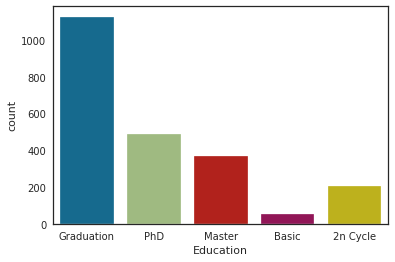

In [95]:
# Analyze Education 
print(df['Education'].value_counts())
sns.countplot(df['Education'])
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['Education'].value_counts().index, values=df['Education'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing Education")
fig.show()

In [96]:
# Correlation we can find between Education and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')


Edu_df = df.groupby(by = ['Education']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum','MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = Edu_df['Education'].to_numpy(), 
                             y = Edu_df[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace", size=12, color="#7f7f7f"), showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [97]:
## Changing  Education
## using map function from dataframe
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [98]:
## Classifying education into two categories. 
## 1. Undergraduate
## 2. Post Graduate

df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduation')

Unique categories present in the Education:
 Post Graduate       2186
Under Graduation      54
Name: Education, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

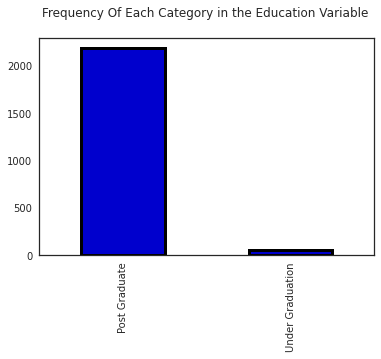

In [99]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Education"
print("Unique categories present in the Education:\n",df["Education"].value_counts())
print('\n')
#VISUALIZING THE "Education"
df['Education'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n")

In [100]:
## Converting from string to datetime 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [101]:
type(df['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Creating more features

In [102]:
## Analyze Year of Birth
## Adding a column "Age" in the dataframe
df['Age'] =  int(pd.datetime.now().year) - df['Year_Birth']
print(df.head())


   Year_Birth      Education    Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Post Graduate  non_relationship  58138.0        0         0   
1        1954  Post Graduate  non_relationship  46344.0        1         1   
2        1965  Post Graduate   in_relationship  71613.0        0         0   
3        1984  Post Graduate   in_relationship  26646.0        1         0   
4        1981  Post Graduate   in_relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



128     1
81      1
122     1
80      1
121     1
25      2
27      3
28      5
26      5
77      7
78      7
76      8
29     13
30     15
75     16
74     16
31     18
73     21
34     27
71     29
33     29
32     30
72     30
36     32
68     35
60     36
37     38
40     39
41     39
57     42
38     42
35     42
64     43
70     43
59     44
54     44
39     45
58     45
61     49
66     49
67     50
55     50
62     51
53     51
69     52
44     52
63     53
42     53
65     55
47     69
52     71
56     74
48     74
43     77
51     77
49     79
46     83
50     87
45     89
Name: Age, dtype: int64
The Oldest customer is : 128 years old
The youngest customer is : 25 years old


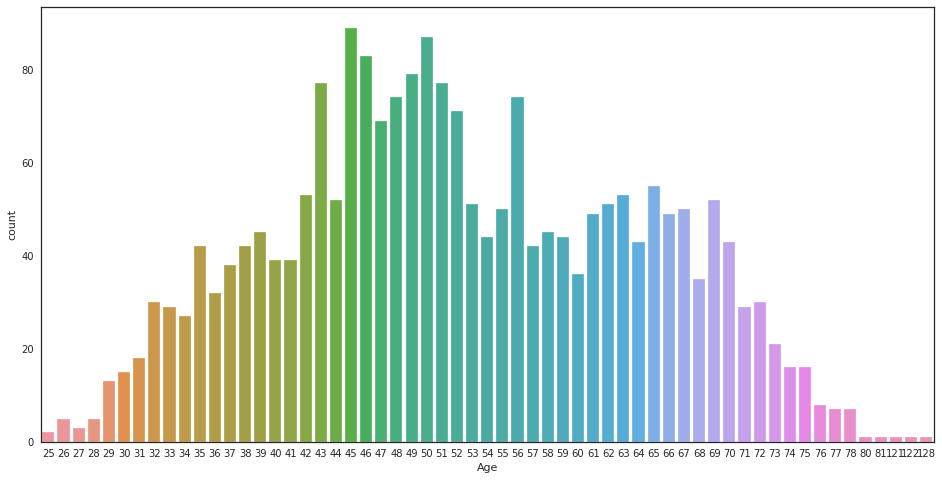

In [103]:
# print Age 
print(df['Age'].value_counts(ascending=True))
print("The Oldest customer is :",df['Age'].max(), "years old")
print("The youngest customer is :",df['Age'].min(), "years old")
plt.figure(figsize = (16,8))
sns.countplot(df['Age'])

The Oldest customer is : 81 years old
80     1
81     1
25     2
27     3
28     5
26     5
77     7
78     7
76     8
29    13
30    15
75    16
74    16
31    18
73    21
34    27
33    29
71    29
32    30
72    30
36    32
68    35
60    36
37    38
40    39
41    39
57    42
35    42
38    42
70    43
64    43
54    44
59    44
39    45
58    45
66    49
61    49
67    50
55    50
53    51
62    51
69    52
44    52
63    53
42    53
65    55
47    69
52    71
56    74
48    74
51    77
43    77
49    79
46    83
50    87
45    89
Name: Age, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



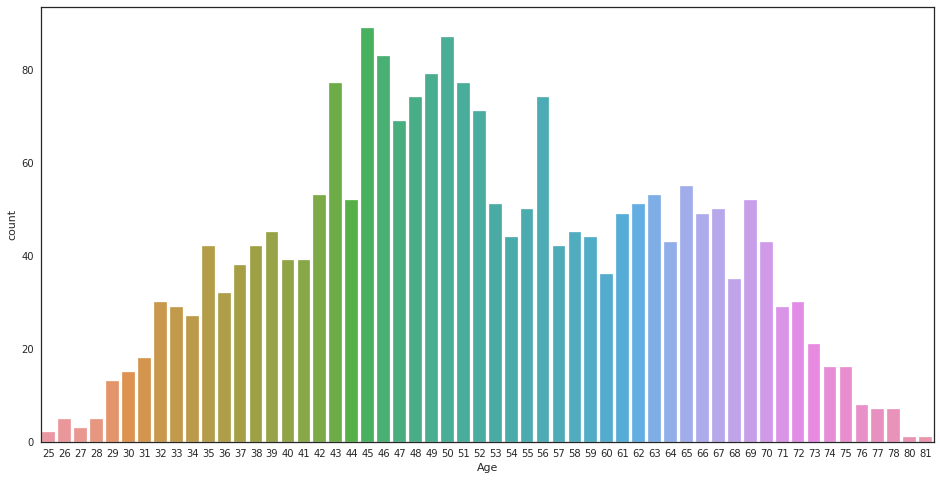

In [104]:
#Dropping the outliers by setting a cap on Age. 
df = df[(df['Age']<90)]
print("The Oldest customer is :",df['Age'].max(), "years old")
print(df['Age'].value_counts(ascending=True))
plt.figure(figsize = (16,8))
sns.countplot(df['Age'])

In [105]:
#  correlation  between age and the given products 
#('MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')   
# create function which will give  Age  interval 
 
    
def create_interval_column(age_df, interval):
    inter = []
    interval = interval
    j = 0
    while (j<100):
        j = j + interval
        inter.append(j)
    interval_column = [] 
    for i in age_df['Year_Birth']:
        for j in range(len(inter)-1):
            if inter[j]<i <=inter[j+1]:
                interval_column.append(str(inter[j]) + '-' + str(inter[j+1]))
                break
    return interval_column

interval_you_want_to_plot = 10 

columns_to_be_analyzed = ['MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

age_df = df.groupby(by = ['Year_Birth']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum','MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()
age_df['Year_Birth'] = int(pd.datetime.now().year) - age_df['Year_Birth'] 
age_df.drop([0,1,2], axis = 0, inplace=True)

interval_column = create_interval_column(age_df, interval=interval_you_want_to_plot )# Creating interval of 5

age_df['Interval_column'] = interval_column

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = age_df['Interval_column'].to_numpy(), 
                             y = age_df[columns_to_be_analyzed[cnt]].to_numpy()), 
                    row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"),
                 showlegend=False,autosize=True,
                  width=1200,
                  height=800)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



0    1291
1     898
2      48
Name: Kidhome, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



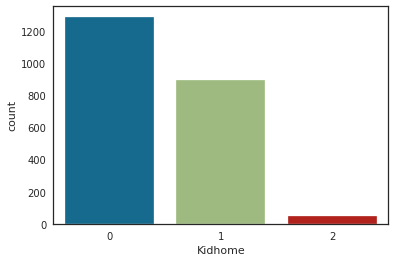

In [106]:
#Calculate the Kidhome: Number of children in customer's household
print(df['Kidhome'].value_counts())
sns.countplot(df['Kidhome'])

0    1156
1    1029
2      52
Name: Teenhome, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



array([0, 1, 2])

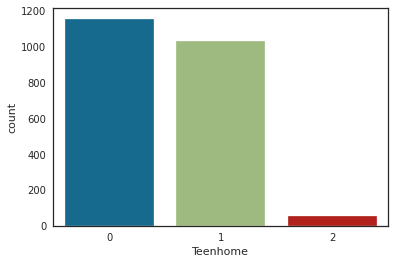

In [107]:
#Calculate the Teenhome: Number of teens in customer's household
print(df['Teenhome'].value_counts())
sns.countplot(df['Teenhome'])
df['Teenhome'].unique()

Unique categories present in the Kids:
 1    1126
0     637
2     421
3      53
Name: Kids, dtype: int64


['Education', 'Marital_Status']
Maretial-status 
 0    1443
1     794
Name: Marital_Status, dtype: int64


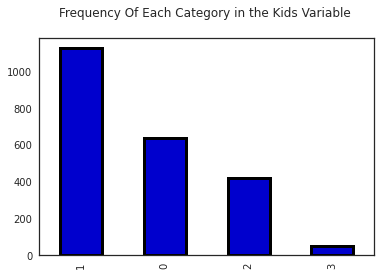

In [108]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Kids"
print("Unique categories present in the Kids:\n",df['Kids'].value_counts())
print("\n")


#VISUALIZING THE "Kids"
df['Kids'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Kids Variable \n")


# Add Family size 
#Feature for total members in the householde


obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
  

label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])
print(obj_col) 

print("Maretial-status \n" , df['Marital_Status'].value_counts())



In [109]:

## Through below code, We are finding total monthly purchase/spend of the customers

df['Total_Spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
## We are finding the total number of purchases(Deals, web, catelog and store) the customer made 
df['AllPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df['AverageCheck'] = round((df['Total_Spend'] / df['AllPurchases']), 2)
## Total number of accepted offers
df['TotalAcceptedOffers'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']



#Seniority variable creation
## Finding the number of days the person is client
## Finding the max time

df['Collected'] = '2014-12-06'
df['Collected'] = pd.to_datetime(df['Collected'])
df['Days_is_client'] = (df['Collected'] - df['Dt_Customer']).dt.days
 

## cap on income 
df.query('Income != 666666.0', inplace=True)
print("max income is:",df['Income'].max())
print("min income is:",df['Income'].min())

## Removing customers who didnt make a purchase
## query is used to evaluate some condition 
df = df.query('AllPurchases != 0')

#highlight the age and time that a person is a client
print( "This customer is with us since",df['Dt_Customer'].min())  
print ("This Customer joined recently from this date:", df['Dt_Customer'].max())





## Recency analysis
print( "Customer with most recent non transaction streak is",df['Recency'].min(),"days")  
print ("Customer with longest non transaction streak is",df['Recency'].max(),"days")
# Rename features 
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
df.head()

cust =df.copy()




max income is: 162397.0
min income is: 1730.0
This customer is with us since 2012-01-08 00:00:00
This Customer joined recently from this date: 2014-12-06 00:00:00
Customer with most recent non transaction streak is 0 days
Customer with longest non transaction streak is 99 days


### Removing irrelevant features

In [110]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'Web', 'Catalog', 'Store',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Kids',
       'Total_Spend', 'AllPurchases', 'AverageCheck', 'TotalAcceptedOffers',
       'Collected', 'Days_is_client'],
      dtype='object')

In [111]:
irrelevantFeats = ['Kidhome', 'Teenhome', 'Year_Birth',
                   'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 
                   'AcceptedCmp1', 'AcceptedCmp2','Complain','Response','Wines', 'Fruits', 'Meat', 'Fish',
                    'Sweets', 'Gold','Collected','Dt_Customer','Web', 'Catalog', 'Store' ]
df.drop(irrelevantFeats, axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Age,Kids,Total_Spend,AllPurchases,AverageCheck,TotalAcceptedOffers,Days_is_client
0,0,1,58138.0,58,3,7,64,0,1617,25,64.68,1,971
1,0,1,46344.0,38,2,5,67,2,27,6,4.50,0,125
2,0,0,71613.0,26,1,4,56,0,776,21,36.95,0,472
3,0,0,26646.0,26,2,6,37,1,53,8,6.62,0,65
4,0,0,58293.0,94,5,5,40,1,422,19,22.21,0,321


In [112]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'Age', 'Kids', 'Total_Spend', 'AllPurchases',
       'AverageCheck', 'TotalAcceptedOffers', 'Days_is_client'],
      dtype='object')

In [113]:
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Age,Kids,Total_Spend,AllPurchases,AverageCheck,TotalAcceptedOffers,Days_is_client
0,0,1,58138.0,58,3,7,64,0,1617,25,64.68,1,971
1,0,1,46344.0,38,2,5,67,2,27,6,4.50,0,125
2,0,0,71613.0,26,1,4,56,0,776,21,36.95,0,472
3,0,0,26646.0,26,2,6,37,1,53,8,6.62,0,65
4,0,0,58293.0,94,5,5,40,1,422,19,22.21,0,321


In [114]:
# check the Data set 
df.info()
  
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2232 non-null   int64  
 1   Marital_Status       2232 non-null   int64  
 2   Income               2232 non-null   float64
 3   Recency              2232 non-null   int64  
 4   NumDealsPurchases    2232 non-null   int64  
 5   NumWebVisitsMonth    2232 non-null   int64  
 6   Age                  2232 non-null   int64  
 7   Kids                 2232 non-null   int64  
 8   Total_Spend          2232 non-null   int64  
 9   AllPurchases         2232 non-null   int64  
 10  AverageCheck         2232 non-null   float64
 11  TotalAcceptedOffers  2232 non-null   int64  
 12  Days_is_client       2232 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 244.1 KB


,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Age,Kids,Total_Spend,AllPurchases,AverageCheck,TotalAcceptedOffers,Days_is_client
0,0,1,58138.0,58,3,7,64,0,1617,25,64.68,1,971
1,0,1,46344.0,38,2,5,67,2,27,6,4.50,0,125
2,0,0,71613.0,26,1,4,56,0,776,21,36.95,0,472
3,0,0,26646.0,26,2,6,37,1,53,8,6.62,0,65
4,0,0,58293.0,94,5,5,40,1,422,19,22.21,0,321


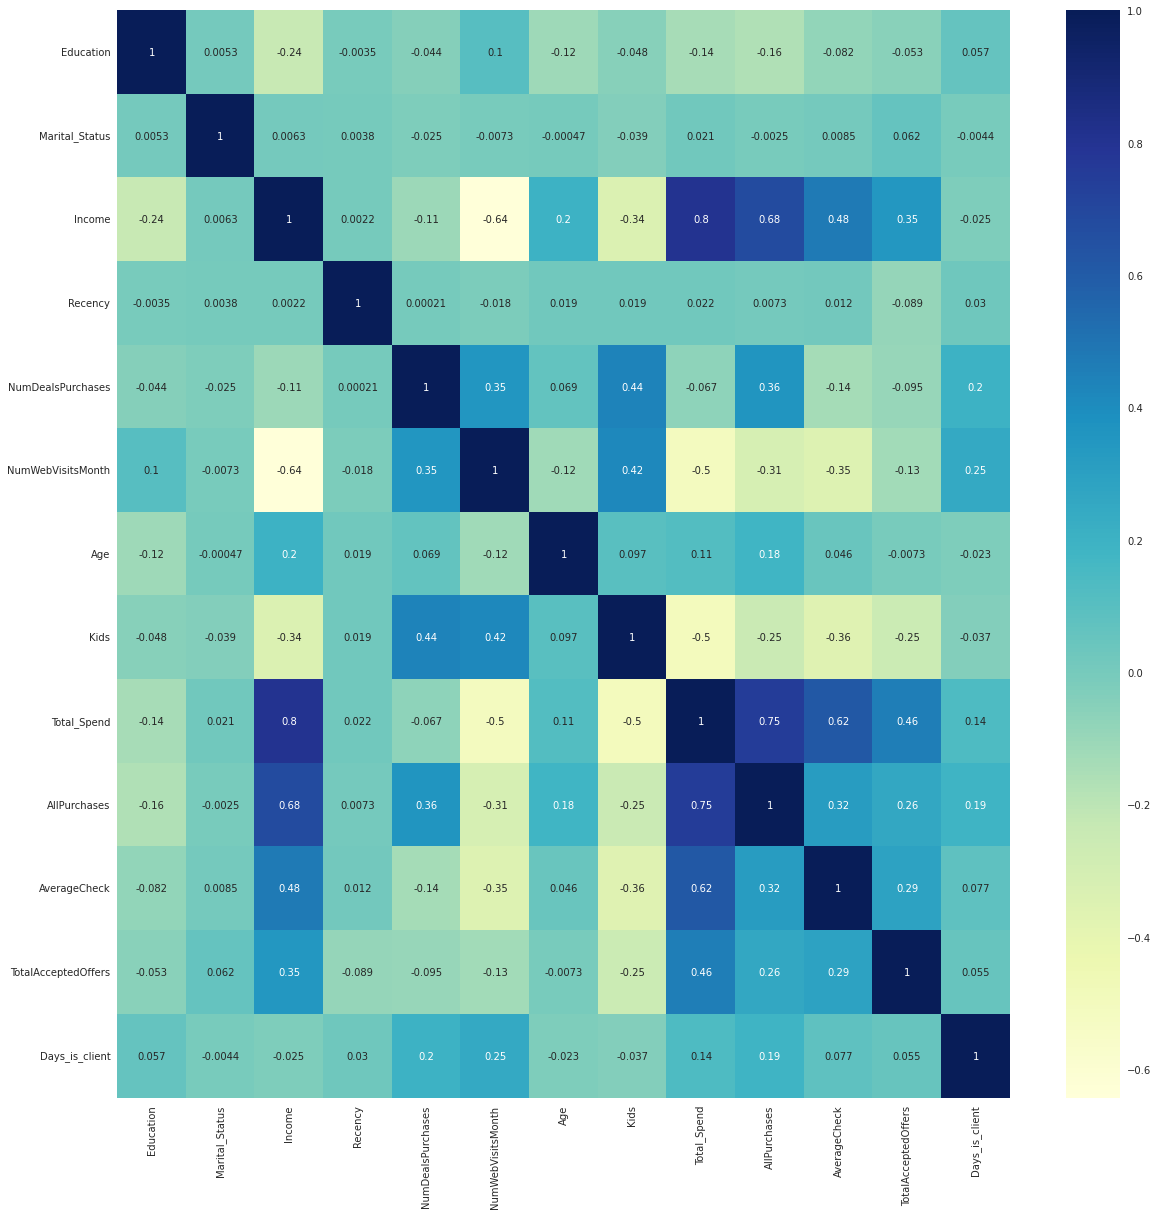

In [115]:
fig, ax = plt.subplots(figsize=(20,20))  
fig = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [116]:
irrelevantFeats = ['Recency','NumWebVisitsMonth']
df.drop(irrelevantFeats, axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Total_Spend,AllPurchases,AverageCheck,TotalAcceptedOffers,Days_is_client
0,0,1,58138.0,3,64,0,1617,25,64.68,1,971
1,0,1,46344.0,2,67,2,27,6,4.50,0,125
2,0,0,71613.0,1,56,0,776,21,36.95,0,472
3,0,0,26646.0,2,37,1,53,8,6.62,0,65
4,0,0,58293.0,5,40,1,422,19,22.21,0,321


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2232 non-null   int64  
 1   Marital_Status       2232 non-null   int64  
 2   Income               2232 non-null   float64
 3   NumDealsPurchases    2232 non-null   int64  
 4   Age                  2232 non-null   int64  
 5   Kids                 2232 non-null   int64  
 6   Total_Spend          2232 non-null   int64  
 7   AllPurchases         2232 non-null   int64  
 8   AverageCheck         2232 non-null   float64
 9   TotalAcceptedOffers  2232 non-null   int64  
 10  Days_is_client       2232 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 209.2 KB


In [118]:
### arrange columns 
df = df[["Education","Marital_Status","Kids","Total_Spend","AllPurchases","Days_is_client","Age","Income","AverageCheck","TotalAcceptedOffers"]]


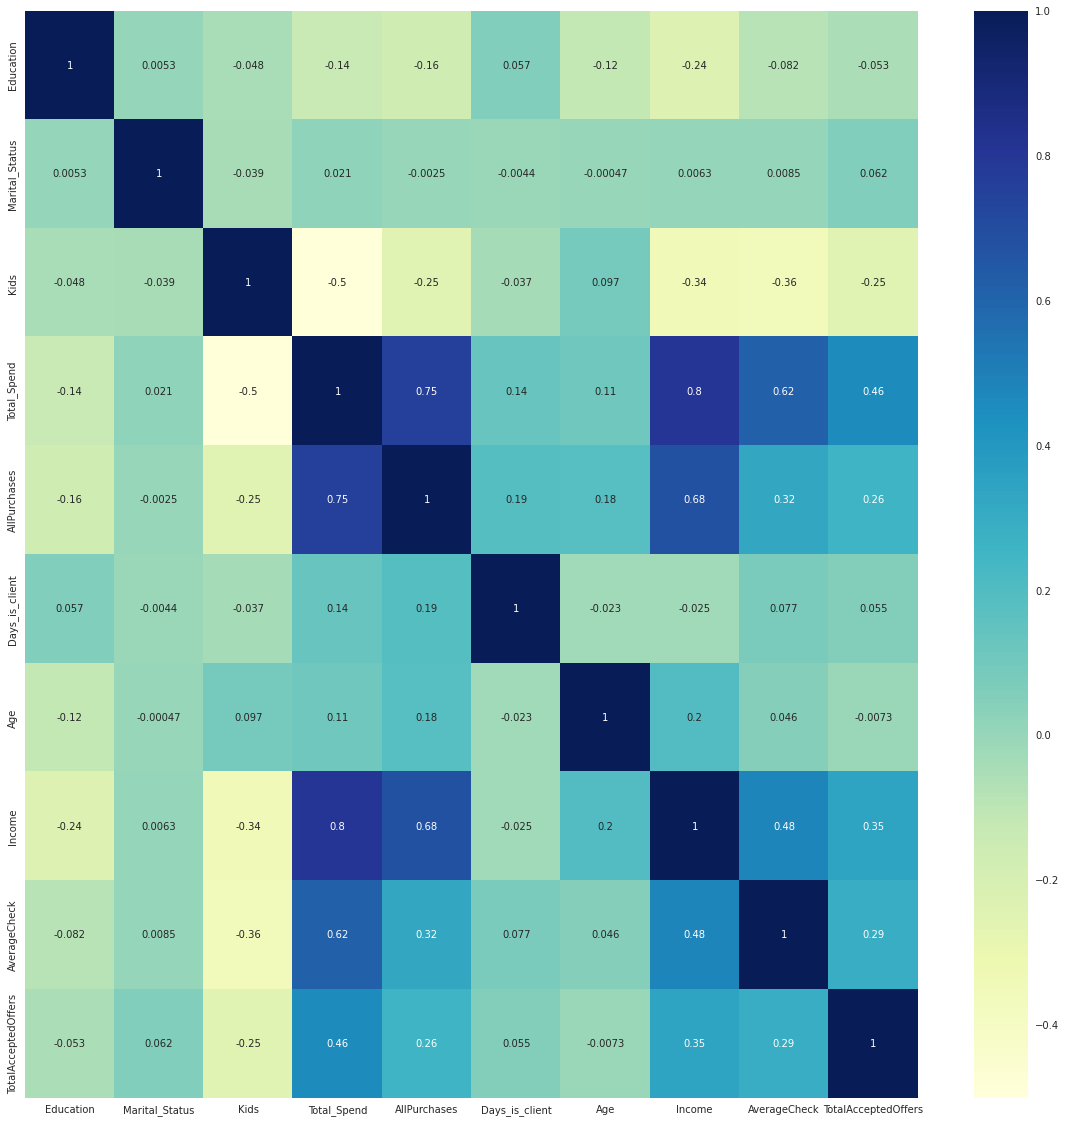

In [119]:
fig, ax = plt.subplots(figsize=(20,20))  
fig = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [120]:
#Get list of Numirical variables
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['Education', 'Marital_Status', 'Kids', 'Total_Spend', 'AllPurchases', 'Days_is_client', 'Age', 'Income', 'AverageCheck', 'TotalAcceptedOffers']


In [121]:
df.dtypes

Education                int64
Marital_Status           int64
Kids                     int64
Total_Spend              int64
AllPurchases             int64
Days_is_client           int64
Age                      int64
Income                 float64
AverageCheck           float64
TotalAcceptedOffers      int64
dtype: object

In [122]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [123]:
df['Education'].value_counts()

0    2178
1      54
Name: Education, dtype: int64

In [124]:
df[ 'Marital_Status'].value_counts()

0    1441
1     791
Name: Marital_Status, dtype: int64

In [125]:
df.isna().any()

Education              False
Marital_Status         False
Kids                   False
Total_Spend            False
AllPurchases           False
Days_is_client         False
Age                    False
Income                 False
AverageCheck           False
TotalAcceptedOffers    False
dtype: bool

In [126]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [127]:
df['Marital_Status'].value_counts()

0    1441
1     791
Name: Marital_Status, dtype: int64

In [128]:
lbl_encode = LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2232 non-null   int64  
 1   Marital_Status       2232 non-null   int64  
 2   Kids                 2232 non-null   int64  
 3   Total_Spend          2232 non-null   int64  
 4   AllPurchases         2232 non-null   int64  
 5   Days_is_client       2232 non-null   int64  
 6   Age                  2232 non-null   int64  
 7   Income               2232 non-null   float64
 8   AverageCheck         2232 non-null   float64
 9   TotalAcceptedOffers  2232 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 191.8 KB


In [130]:
df.head()


,Education,Marital_Status,Kids,Total_Spend,AllPurchases,Days_is_client,Age,Income,AverageCheck,TotalAcceptedOffers
0,0,1,0,1617,25,971,64,58138.0,64.68,1
1,0,1,2,27,6,125,67,46344.0,4.50,0
2,0,0,0,776,21,472,56,71613.0,36.95,0
3,0,0,1,53,8,65,37,26646.0,6.62,0
4,0,0,1,422,19,321,40,58293.0,22.21,0


In [131]:
df['Marital_Status'].value_counts()

0    1441
1     791
Name: Marital_Status, dtype: int64

In [132]:
df['Education'].value_counts()

0    2178
1      54
Name: Education, dtype: int64

In [133]:
print (df.isna())

      Education  Marital_Status   Kids  Total_Spend  AllPurchases  \
0         False           False  False        False         False   
1         False           False  False        False         False   
2         False           False  False        False         False   
3         False           False  False        False         False   
4         False           False  False        False         False   
5         False           False  False        False         False   
6         False           False  False        False         False   
7         False           False  False        False         False   
8         False           False  False        False         False   
9         False           False  False        False         False   
10        False           False  False        False         False   
11        False           False  False        False         False   
12        False           False  False        False         False   
13        False           False  F

In [134]:

df.dropna()
df.isna().any()

Education              False
Marital_Status         False
Kids                   False
Total_Spend            False
AllPurchases           False
Days_is_client         False
Age                    False
Income                 False
AverageCheck           False
TotalAcceptedOffers    False
dtype: bool

##Confirm data is ready with further exploratory analysis

In [135]:
print("Data is cleand , Numaric and ready for further EDA")

Data is cleand , Numaric and ready for further EDA


In [136]:
# Export to CSV file
df.to_csv('./marketingDf_cleaned.csv', index=False)

In [137]:
## importing the cleaned data csv file
df_cleaned = pd.read_csv('./marketingDf_cleaned.csv')

In [138]:
df_cleaned.head()

,Education,Marital_Status,Kids,Total_Spend,AllPurchases,Days_is_client,Age,Income,AverageCheck,TotalAcceptedOffers
0,0,1,0,1617,25,971,64,58138.0,64.68,1
1,0,1,2,27,6,125,67,46344.0,4.50,0
2,0,0,0,776,21,472,56,71613.0,36.95,0
3,0,0,1,53,8,65,37,26646.0,6.62,0
4,0,0,1,422,19,321,40,58293.0,22.21,0


## (5) Choose the label and features

In [139]:
# Create two DataFrames for both the label and the features
labelDf = df_cleaned['Total_Spend']
featuresDf = df_cleaned.drop(['Education','Marital_Status'], axis=1)
print(featuresDf.head())

   Kids  Total_Spend  AllPurchases  Days_is_client  Age   Income  \
0     0         1617            25             971   64  58138.0   
1     2           27             6             125   67  46344.0   
2     0          776            21             472   56  71613.0   
3     1           53             8              65   37  26646.0   
4     1          422            19             321   40  58293.0   

   AverageCheck  TotalAcceptedOffers  
0         64.68                    1  
1          4.50                    0  
2         36.95                    0  
3          6.62                    0  
4         22.21                    0  


## (6) Confirm data is ready with further exploratory analysis

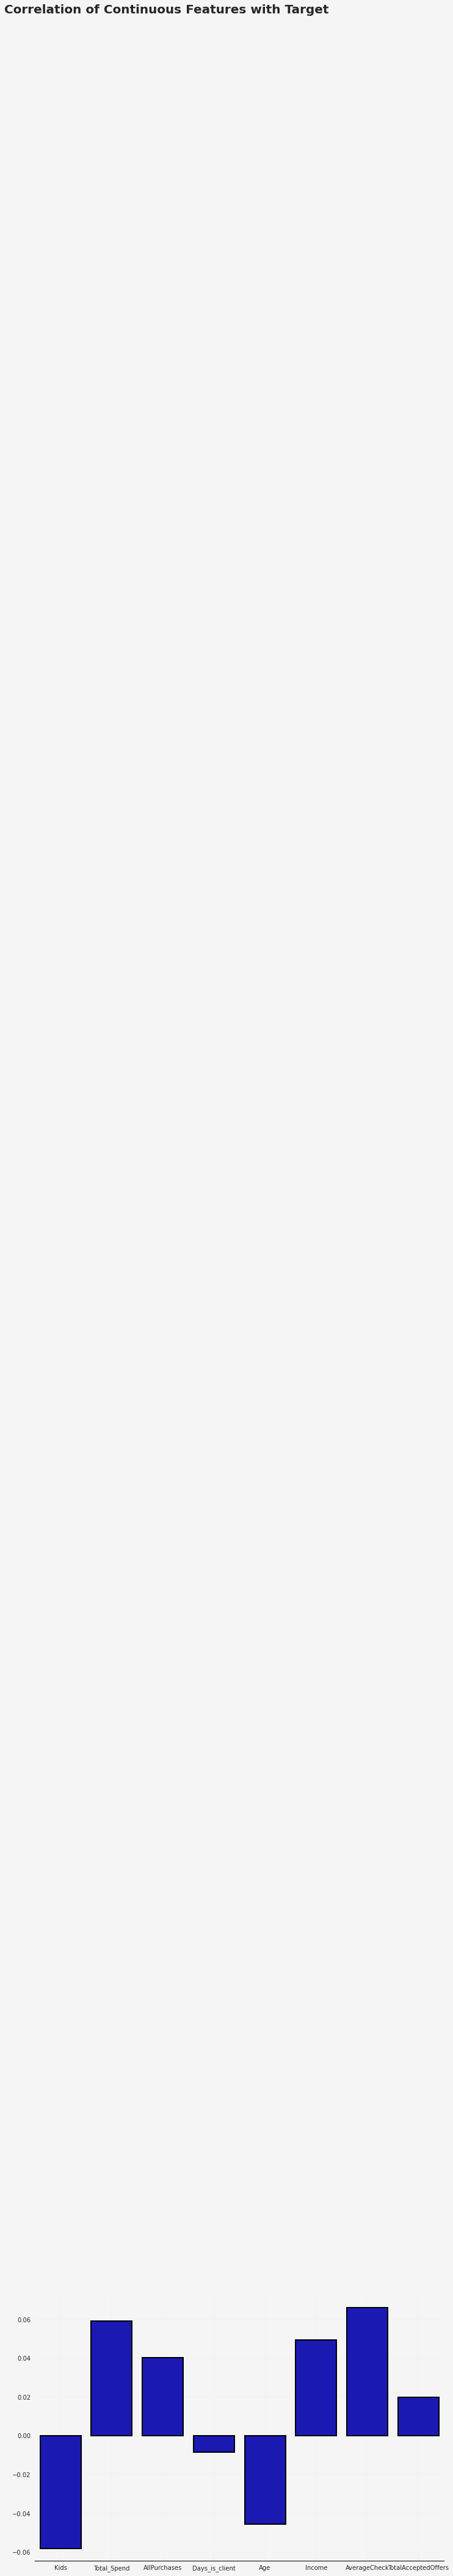

In [140]:
import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(12, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(featuresDf.corrwith(df['Total_Spend']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='mediumblue', zorder=3, edgecolor='black', linewidth=2)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

In [141]:
df_cleaned.head()

,Education,Marital_Status,Kids,Total_Spend,AllPurchases,Days_is_client,Age,Income,AverageCheck,TotalAcceptedOffers
0,0,1,0,1617,25,971,64,58138.0,64.68,1
1,0,1,2,27,6,125,67,46344.0,4.50,0
2,0,0,0,776,21,472,56,71613.0,36.95,0
3,0,0,1,53,8,65,37,26646.0,6.62,0
4,0,0,1,422,19,321,40,58293.0,22.21,0


In [142]:
df1 = df_cleaned.copy()

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

sf_df.head().style.set_properties(**{"background-color": "#fffc99","color": "black", "border-color": "black"})



,Education,Marital_Status,Kids,Total_Spend,AllPurchases,Days_is_client,Age,Income,AverageCheck,TotalAcceptedOffers
0,-0.157459,1.349720,-1.266206,1.678383,1.319135,1.974525,1.017252,0.294340,0.696575,0.619142
1,-0.157459,1.349720,1.393721,-0.963984,-1.162208,-1.668565,1.273613,-0.263234,-0.640396,-0.502550
2,-0.157459,-0.740894,-1.266206,0.280753,0.796747,-0.174295,0.333622,0.931385,0.080520,-0.502550
3,-0.157459,-0.740894,0.063757,-0.920776,-0.901014,-1.926940,-1.289999,-1.194478,-0.593298,-0.502550
4,-0.157459,-0.740894,0.063757,-0.307547,0.535553,-0.824539,-1.033638,0.301668,-0.246947,-0.502550


In [143]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(sf_df)
PCA_ds = pd.DataFrame(pca.transform(sf_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2232.0,-3.447063e-17,1.847628,-3.160262,-1.669555,-0.295715,1.446446,14.174210
col2,2232.0,-5.670494e-18,1.128371,-3.093443,-0.746498,-0.105677,0.562276,6.717981
col3,2232.0,-4.267793e-17,1.024357,-3.095114,-0.693131,-0.008022,0.724035,3.179315


In [144]:
cust_clust = sf_df[['AverageCheck', 'Days_is_client', 'AllPurchases']].copy()

for i in cust_clust.columns:
    cust_clust[i] = StandardScaler().fit_transform(np.array(cust_clust[[i]]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



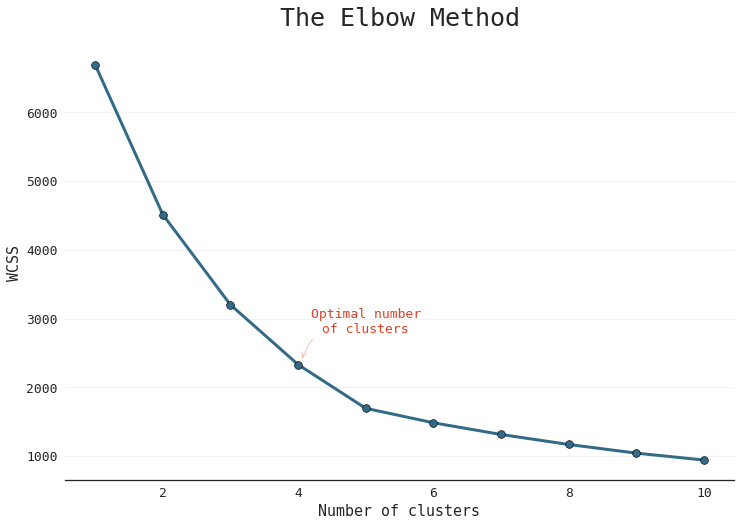

In [145]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(cust_clust)
    wcss.append(km.inertia_)
    
plt.figure(figsize = (12, 8))
plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)
sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)
plt.ylabel('WCSS', size = 15, fontname = 'monospace')
plt.xlabel('Number of clusters', size = 15, fontname = 'monospace')
plt.xticks(size = 13, fontname = 'monospace')
plt.yticks(size = 13, fontname = 'monospace')

for j in ['right', 'top', 'left']:
    a.spines[j].set_visible(False)
a.spines['bottom'].set_linewidth(1.3)
a.spines['left'].set_linewidth(1.3)

plt.annotate('''Optimal number
of clusters''', xy = (4.05, 2400), xytext = (5, 2800),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->", connectionstyle = "arc3,rad = 0.4",color = '#dd4124'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = '#dd4124')

plt.show()



In [146]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(cust_clust)
labels = gmm.predict(cust_clust)

df_cleaned['Cluster'] = labels
re_clust = {
    0: 'Ordinary client',
    1: 'Elite client',
    2: 'Good client',
    3: 'Potential good client'
}
df_cleaned['Cluster'] = df_cleaned['Cluster'].map(re_clust)

In [147]:
fig = px.pie(df_cleaned['Cluster'].value_counts().reset_index(), values = 'Cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#dd4124','#009473', '#336b87', '#b4b4b4'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clients: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of clients <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

In [148]:
plot = go.Figure()

colors = ['#b4b4b4', '#dd4124', '#009473', '#336b87']
names = ['Ordinary client', 'Elite client', 'Good client', 'Potential good client']

for i in range(4):
    cl = names[i]
    plot.add_trace(go.Scatter3d(x = df_cleaned.query("Cluster == @cl")['AllPurchases'],
                                y = df_cleaned.query("Cluster == @cl")['AverageCheck'],
                                z = df_cleaned.query("Cluster == @cl")['Days_is_client'],
                                mode = 'markers',
                                name = names[i],
                                marker = dict(
                                    size = 2,
                                    color = colors[i],  
                                    opacity = 0.6)))

plot.update_traces(hovertemplate = 'Purchases: %{x} <br>Average Check: %{y} <br>Days is client: %{z}')

plot.update_layout(width = 800, height = 800, autosize = True, showlegend = False,
                   scene = dict(xaxis = dict(title = 'Count of purchases', titlefont_color = 'black'),
                                yaxis = dict(title = 'Average check', titlefont_color = 'black'),
                                zaxis = dict(title = 'Days is client', titlefont_color = 'black')),
                   font = dict(family = "monospace", color  = 'black', size = 14),
                   title_text = 'Customers clusters', title_x = 0.5)

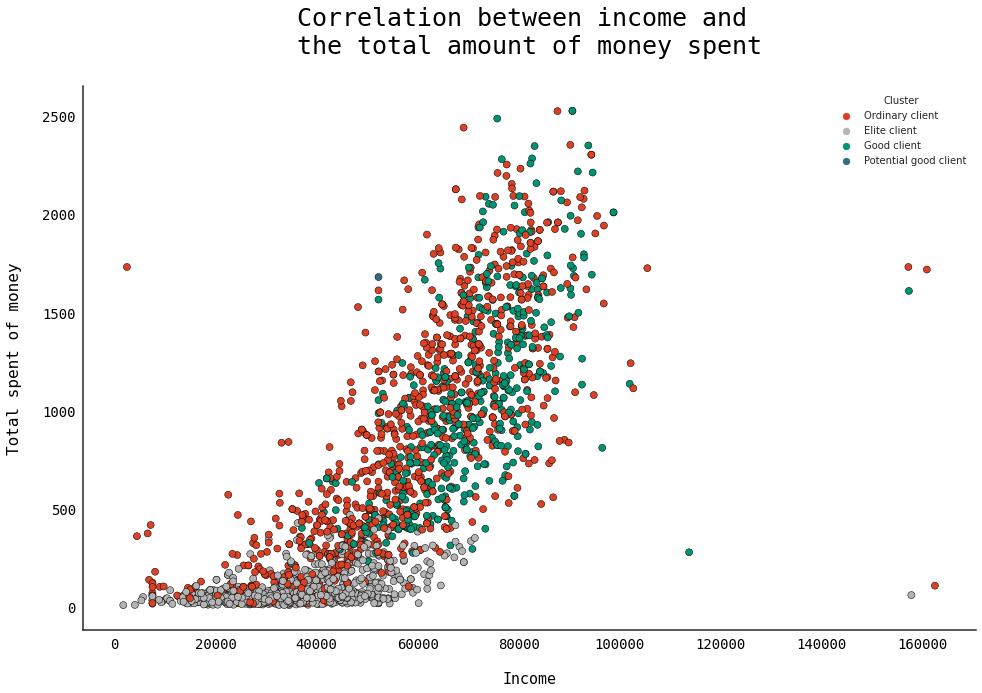

In [149]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''Correlation between income and 
the total amount of money spent''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = df_cleaned, x = "Income", y = "Total_Spend", hue = "Cluster", palette = ['#dd4124', '#b4b4b4', '#009473', '#336b87'], sizes = (1, 8), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 14, color = 'black')
plt.yticks(fontname = 'monospace', size = 14, color = 'black')
plt.xlabel('Income', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Total spent of money', labelpad = 20, fontname = 'monospace', fontsize = 16, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:3

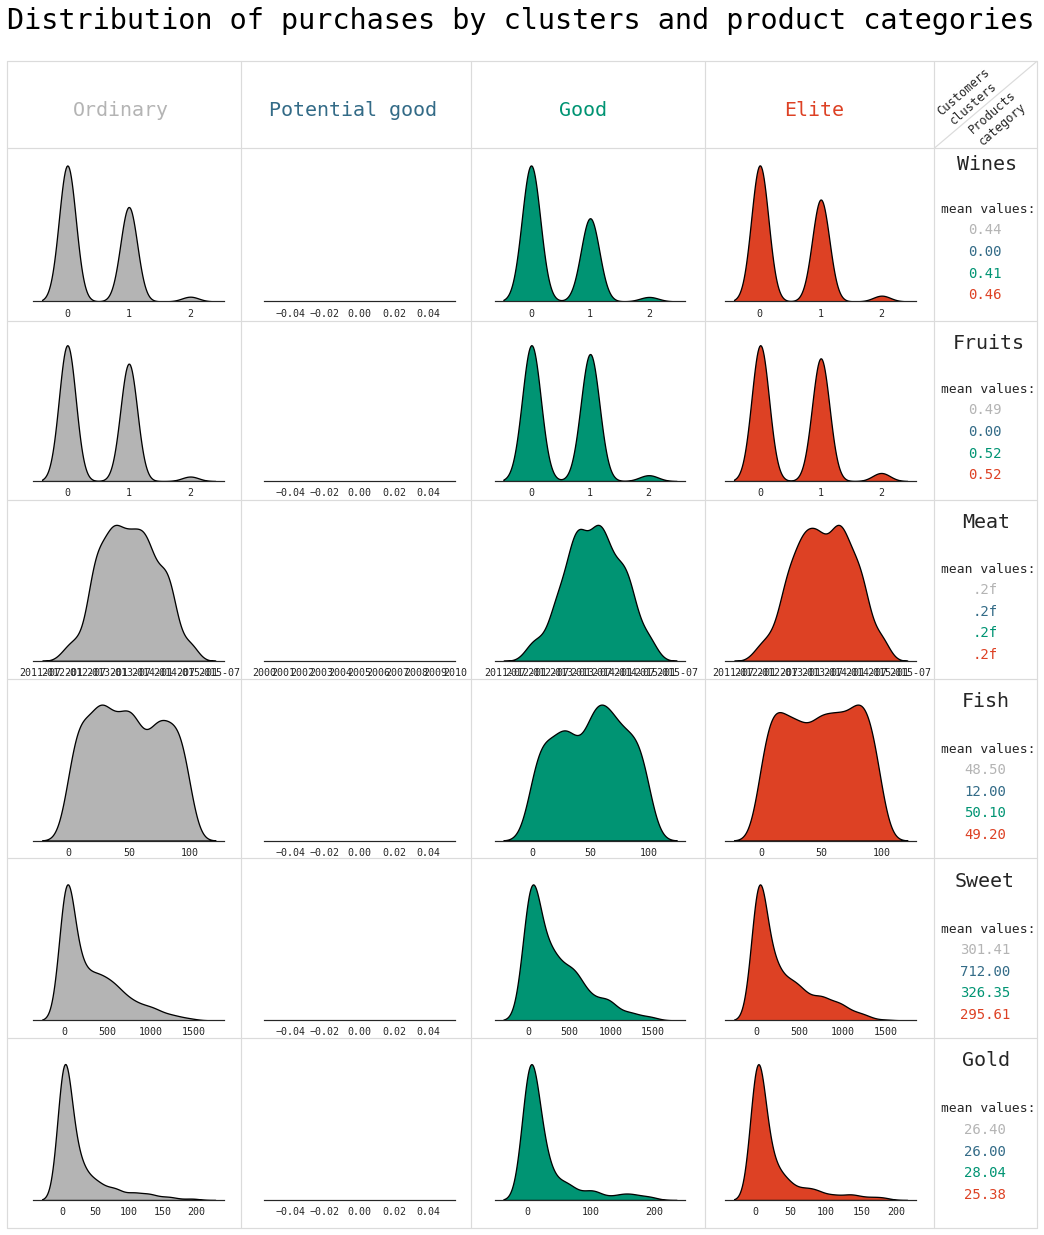

In [150]:
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.testing import assert_equal, assert_almost_equal
cust= cust.rename(columns = {'MntWines': 'Wines', 
                       'MntFruits': 'Fruits', 
                       'MntMeatProducts': 'Meat', 
                       'MntFishProducts': 'Fish', 
                       'MntSweetProducts': 'Sweet', 
                       'MntGoldProds': 'Gold'})
cust["Cluster"]=df_cleaned["Cluster"]

cl = ['Ordinary client', 'Potential good client', 'Good client', 'Elite client']
colors = {
    'Ordinary client': '#b4b4b4',
    'Potential good client': '#336b87',
    'Good client': '#009473',
    'Elite client': '#dd4124'
}

fig = plt.figure(figsize = (13, 15))
p = 1
for i in range(len(cust.columns.tolist()[4:10])):
    for k in cl:
        plt.subplot(6, 4, p)
        sns.set_style("white")
        a = sns.kdeplot(cust.query("Cluster == @k")[cust.columns.tolist()[4:10][i]], color = colors[k], alpha = 1, shade = True, linewidth = 1.3, edgecolor = 'black')
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(fontname = 'monospace')
        plt.yticks([])
        for j in ['right', 'left', 'top']:
            a.spines[j].set_visible(False)
            a.spines['bottom'].set_linewidth(1.2)
        p += 1  

plt.figtext(0., 1.11, 'Distribution of purchases by clusters and product categories', fontname = 'monospace', size = 28.5, color = 'black')        

plt.figtext(0.07, 1.03, 'Ordinary', fontname = 'monospace', size = 20, color = '#b4b4b4')      
plt.figtext(0.28, 1.03, 'Potential good', fontname = 'monospace', size = 20, color = '#336b87') 
plt.figtext(0.59, 1.03, 'Good', fontname = 'monospace', size = 20, color = '#009473') 
plt.figtext(0.83, 1.03, 'Elite', fontname = 'monospace', size = 20, color = '#dd4124') 

plt.figtext(1.015, 0.98, 'Wines', fontname = 'monospace', size = 20)   
plt.figtext(1.01, 0.814, 'Fruits', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.648, 'Meat', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.482, 'Fish', fontname = 'monospace', size = 20)
plt.figtext(1.012, 0.316, 'Sweet', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.15, 'Gold', fontname = 'monospace', size = 20)
l1 = lines.Line2D([0.99, 0.99], [1.08, 0], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l1])
l2 = lines.Line2D([0.0, 1.1], [1, 1], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l2])
l3 = lines.Line2D([0.991, 1.1], [1, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l3])
l4 = lines.Line2D([0, 1.1], [1.08, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l4])
l5 = lines.Line2D([1.1, 1.1], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l5])
l6 = lines.Line2D([0, 0], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l6])
l7 = lines.Line2D([0, 1.1], [0, 0], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l7])
l8 = lines.Line2D([0, 1.1], [0.84, 0.84], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l8])
l9 = lines.Line2D([0, 1.1], [0.674, 0.674], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l9])
l10 = lines.Line2D([0, 1.1], [0.508, 0.508], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l10])
l11 = lines.Line2D([0, 1.1], [0.342, 0.342], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l11])
l12 = lines.Line2D([0, 1.1], [0.176, 0.176], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l12])
l13 = lines.Line2D([0.25, 0.25], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l13])
l14 = lines.Line2D([0.495, 0.495], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l14])
l15 = lines.Line2D([0.745, 0.745], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l15])

plt.figtext(1.027, 1.02, '''Customers
clusters''', fontname = 'monospace', size = 12, rotation = 41, ha = 'center')   
plt.figtext(1.025, 1.003, '''Products
category''', fontname = 'monospace', size = 12, rotation = 41)

y = 0.94
for i in range(6):
    plt.figtext(0.998, y, 'mean values:', fontname = 'monospace', size = 13)
    y -= 0.1666

y = 0.92
for i in cust.columns.tolist()[4:10]:
    plt.figtext(1.045, y, format(cust.query("Cluster == 'Ordinary client'")[i].mean(), ".2f"), fontname = 'monospace', size = 14, color = '#b4b4b4', ha = 'center')
    y -= 0.1666

y = 0.9
for i in cust.columns.tolist()[4:10]:
    plt.figtext(1.045, y, format(cust.query("Cluster == 'Potential good client'")[i].mean(), ".2f"), fontname = 'monospace', size = 14, color = '#336b87', ha = 'center')
    y -= 0.1666

y = 0.88
for i in cust.columns.tolist()[4:10]:
    plt.figtext(1.045, y, format(cust.query("Cluster == 'Good client'")[i].mean(), ".2f"), fontname = 'monospace', size = 14, color = '#009473', ha = 'center')
    y -= 0.1666

y = 0.86
for i in cust.columns.tolist()[4:10]:
    plt.figtext(1.045, y, format(cust.query("Cluster == 'Elite client'")[i].mean(), ".2f"), fontname = 'monospace', size = 14, color = '#dd4124', ha = 'center')
    y -= 0.1666

fig.tight_layout(h_pad = 2)
plt.show()

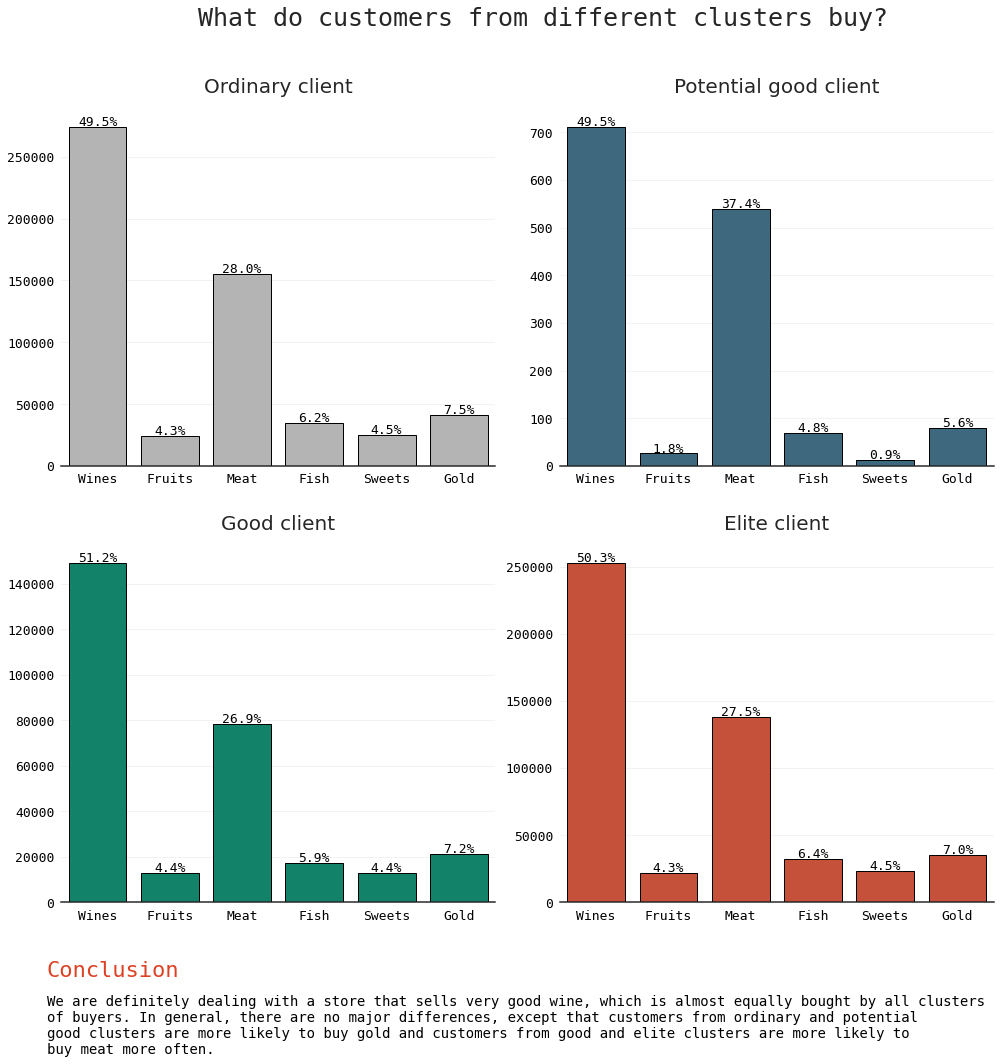

In [151]:
fig = plt.figure(figsize = (14, 12))
k = 1

for i in cl:
    ass = cust.groupby(['Cluster']).agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweets': 'sum', 'Gold': 'sum'}).transpose().reset_index().rename(columns = {'index': 'Category'})[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    a = sns.barplot(data = ass, x = 'Category', y = i, color = colors[i], linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(fontname = 'monospace', size = 13, color = 'black')
    plt.yticks(fontname = 'monospace', size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        height = p.get_height()
        a.annotate(f'{round((height / sum(ass[i])) * 100, 1)}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 13,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'black')
        
    for j in ['right', 'top', 'left']:
        a.spines[j].set_visible(False)
    for j in ['bottom']:
        a.spines[j].set_linewidth(1.5)
    k += 1
    
plt.figtext(0.05, -0.05, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.05, -0.14, '''We are definitely dealing with a store that sells very good wine, which is almost equally bought by all clusters
of buyers. In general, there are no major differences, except that customers from ordinary and potential
good clusters are more likely to buy gold and customers from good and elite clusters are more likely to
buy meat more often.''', fontname = 'monospace', size = 14, color = 'black')
    
plt.figtext(0.2, 1.05, 'What do customers from different clusters buy?', fontname = 'monospace', size = 25)
fig.tight_layout(h_pad = 3)    
plt.show()

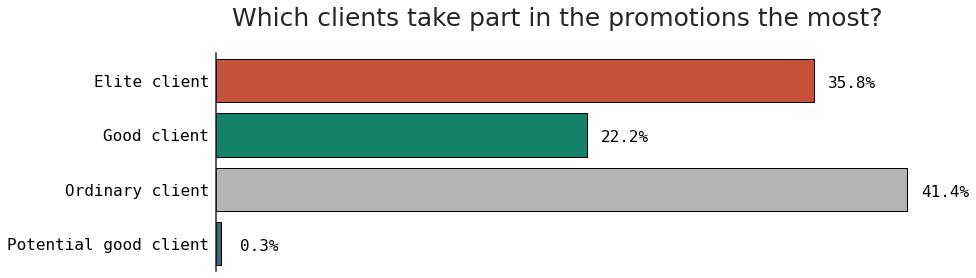

In [152]:


fig = plt.figure(figsize = (13, 4))
palette = ['#dd4124', '#009473', '#b4b4b4', '#336b87']
plt.title('Which clients take part in the promotions the most?', size = 25, x = 0.47, y = 1.1)
a = sns.barplot(data = cust.groupby(['Cluster']).agg({'TotalAcceptedOffers': 'sum'}).reset_index(), 
                x = 'TotalAcceptedOffers', y = 'Cluster', palette = palette, linestyle = "-", linewidth = 1, edgecolor = "black")
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(23 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 1001) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')
    
for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

plt.show()



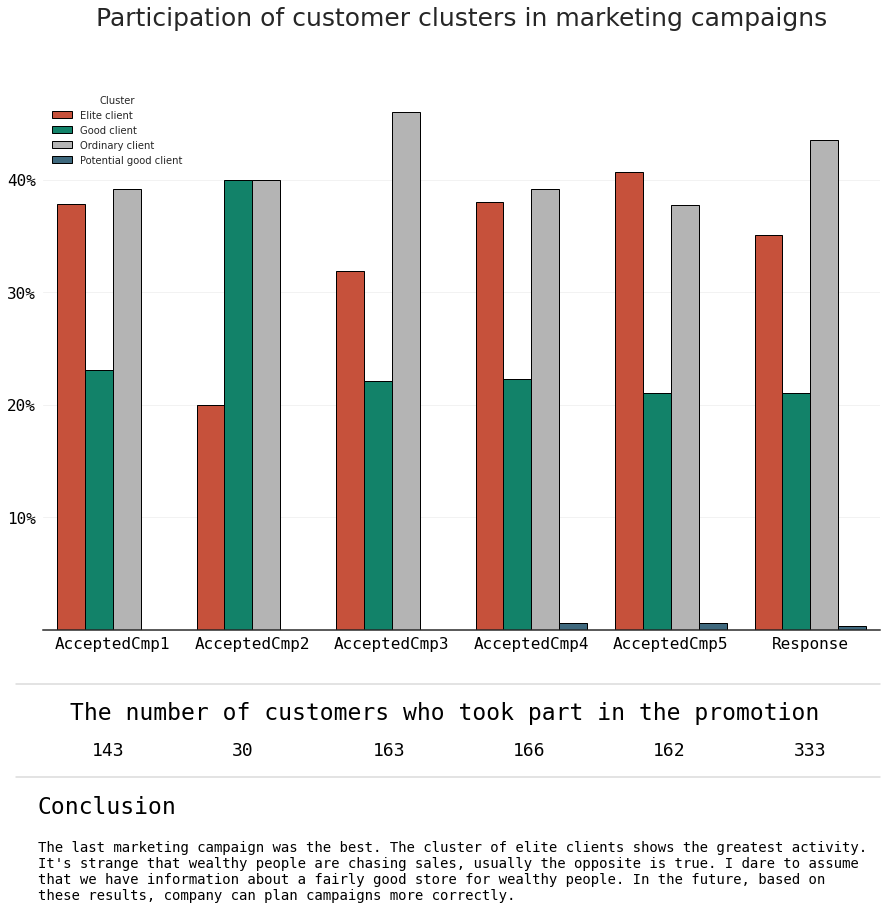

In [153]:
from matplotlib.ticker import FixedLocator, FixedFormatter
df = cust.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                               'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                               'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index().rename(columns = {'level_1':'Cmp', 0: 'value'})
df['sum'] = df.groupby(['Cmp'])['value'].transform('sum')
df['percentage'] = round(df['value'] / df['sum'] * 100, 1)

fig = plt.figure(figsize = (15, 10))
plt.title('Participation of customer clusters in marketing campaigns', size = 25, x = 0.5, y = 1.1)
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
a = sns.barplot(data = df, x = 'Cmp', y = 'percentage', hue = 'Cluster', dodge = True, palette = palette, linestyle = "-", linewidth = 1, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 16, color = 'black')
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

a.yaxis.set_major_formatter(FixedFormatter(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%']))
a.yaxis.set_major_locator(FixedLocator([10, 20, 30, 40, 50, 60, 70, 80]))

for j in ['right', 'top', 'left']:
    a.spines[j].set_visible(False)
for j in ['bottom']:
    a.spines[j].set_linewidth(1.5)

l1 = lines.Line2D([0.1, 0.9], [0.05, 0.05], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(0.15, 0, 'The number of customers who took part in the promotion', fontname = 'monospace', size = 23, color = 'black')

x = 0.17
for i in df[:6]['sum'].tolist():
    plt.figtext(x, -0.05, i, fontname = 'monospace', size = 18, color = 'black')
    x += 0.13

l2 = lines.Line2D([0.1, 0.9], [-0.08, -0.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])

plt.figtext(0.12, -0.13, 'Conclusion', fontname = 'monospace', size = 23, color = 'black')
plt.figtext(0.12, -0.25, '''The last marketing campaign was the best. The cluster of elite clients shows the greatest activity.
It's strange that wealthy people are chasing sales, usually the opposite is true. I dare to assume
that we have information about a fairly good store for wealthy people. In the future, based on
these results, company can plan campaigns more correctly.''', fontname = 'monospace', size = 14, color = 'black')


plt.show()